In [1]:
import richdem as rd
import rasterio
from rasterio import plot
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

In [2]:
madeenah_rio_ds = rasterio.open('./madeenah.tif')

Finding the coordinate system being used by the dataset

In [3]:
madeenah_rio_ds.crs

CRS.from_epsg(4326)

Finding the number of bands in the dataset

In [4]:
madeenah_rio_ds.count

1

Geographical extent (Latitude and Longitude)

In [5]:
madeenah_rio_ds.bounds

BoundingBox(left=38.99986111111111, bottom=23.999861111111112, right=40.000138888888884, top=25.00013888888889)

In [6]:
raster_width = madeenah_rio_ds.width
raster_height = madeenah_rio_ds.height

'width= {}, height={}'.format(raster_width,raster_height)

'width= 3601, height=3601'

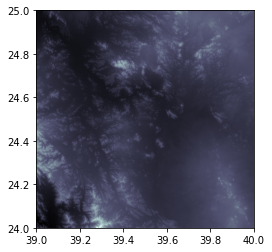

<AxesSubplot:>

In [7]:
rasterio.plot.show(madeenah_rio_ds,cmap='bone')

Converting the dataset to a NumPy array

In [8]:
madeenah_rio_band1 = madeenah_rio_ds.read(1).astype('float64')

In [9]:
madeenah_rio_band1[1,5]

440.0

Latitude and Longitude of element [1,5]

In [10]:
madeenah_rio_ds.xy(1,5)

(39.00138888888889, 24.999722222222225)

Creating RichDEM object

In [11]:
madeenah_richdem = rd.rdarray(madeenah_rio_band1, no_data=-9999)

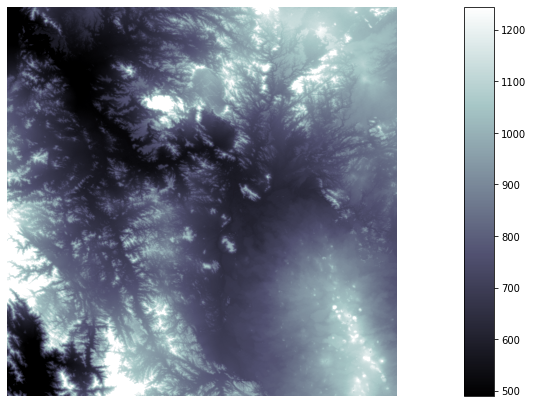

{'vmin': 490.0, 'vmax': 1245.0}

In [12]:
rd.rdShow(madeenah_richdem, axes=False, cmap='bone', figsize=(9, 6))

In [13]:
madeenah_rich_slope = rd.TerrainAttribute(madeenah_richdem, attrib='slope_degrees')

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)



A Slope calculation (degrees)
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

t Wall-time = 0.942212


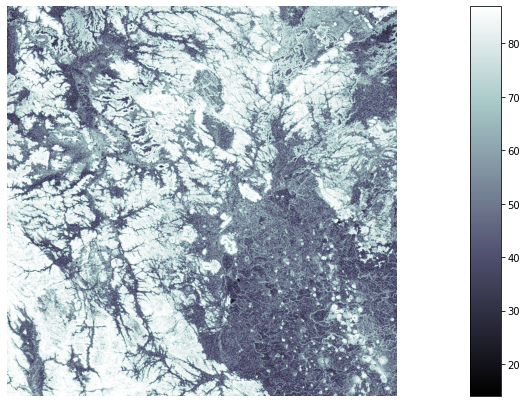

{'vmin': 14.036243438720703, 'vmax': 86.9437255859375}

In [14]:
rd.rdShow(madeenah_rich_slope, axes=False, cmap='bone', figsize=(9, 6))